#### CIE4604 Simulation and Visualization
# Assignment 1 - Random Walk and Colored Noise

In this assignment you will simulate and analyse two random processes (time-series):  a random walk process and a colored noise process.  The colored noise process is very important for simulating measurement errors that are correlated in time. Colored noise is frequently encountered in remote sensing sensors as well as in many physical processes.

**Maxwell Lindsay** 5243610

## Part I - Random Walk

> A random-walk process is generated using the recursive formula
>
> $x_k = x_{k-1} + w_k \ \ \ \ \ w_k \sim N(0,q_k = q \Delta t)$
>
> with $w_k$ normal distributed Gaussian noise with variance $q_k = q \cdot \Delta t$. The variance $q_k$ is a function of the the power spectral density $q$ and sample interval $\Delta t = t_k - t_{k-1}$. The main attraction of working with the power spectral density is that the behaviour of the random-walk process does not depend on the chosen sample interval. In our simulations we will choose $\Delta t = 1$ to keep it simple.
>
> The initial condition $x_0$ is either $x_0 = 0$ (deterministic), or, a drawn from a normal distribution $x_0 \sim N(0,q_k)$ with variance $q_k$ (stochastic). Both options for the initial condition will result in the similar (though shifted) series.
>
> The *formal* standard deviation $\sigma_{x_k}$ of the random walk variable $x_k$ can be computed recursively using error propagation, with the recursive formula
>
> $\sigma_{x_k}^2 = \sigma_{x_{k-1}}^2  + q_k$
>
> The *empirical* standard deviation of the random walk variable $x_k$ can be computed by simulating multiple realizations of the random walk and then computing the standard deviation at every epoch. You will have to compute both in the assignment.

### Question 1.a

> Generate 100 random walk sequences, each with sample interval $\Delta t = 1$ and 2000 samples long, and plot. 
> The plot should contain:
> - The 100 realizations (time-series) of the random walk process $x_k$ , 
> - The formal standard deviation $\sigma_{x_k}$ as function of time, computed using error propagation using the recursive formula,
> - The empirical mean and standard deviation of the different realizations of $x_k$ as function of time. 
>
> Hint: for visual appearance, plot instead of the formal and empirical standard deviations, the boundaries of the 95\% reliability interval $-2 \sigma_{x_k}$ and $+2 \sigma_{x_k}$, or use a separate plot for the mean and standard deviations.


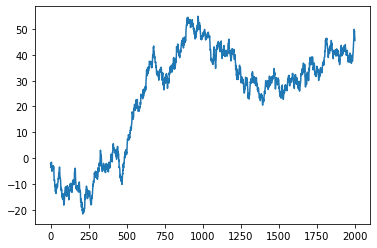

In [190]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import default_rng
rng = default_rng()


def random_walk_basic(power_spec_density: float = 1, delta_t=1, nsamples=2000, rand_initial=True) -> np.ndarray:
    """
    Completes the basic random walk process

    Parameters:
    power_spec_density (float): power spectrum density of the random walk process. Default 1
    delta_t (float): sample interval, defalt 1
    nsamples (int): the number of times to sample the random walk process, default 2000
    rand_initial(bool): if True, start with a random number, if False start with 0. Default True

    Returns:
    np.ndarray vector of the completed process

    """
    # caclulate the variance qk
    qk = power_spec_density*delta_t

    # assign the initial value based on the input parameter
    n0 = 0 if not rand_initial else rng.normal(loc=0, scale=qk, size=1)

    # create and empty array
    walkarray = np.zeros(nsamples)
    # assign the initial condition
    walkarray[0] = n0

    # loop over the empty array calculating the values of the process
    for i in range(1, nsamples):
        walkarray[i] = walkarray[i-1] + \
            rng.normal(loc=0, scale=np.sqrt(qk), size=1)

    return walkarray

# test it using the default parameters
plt.plot(random_walk_basic())


In [191]:
def plot_mean_std_dev(inputarray: np.ndarray, processname: str):
    """ 
    Function that takes an ndarray and calculates the standard deviation and mean across the columns. 
    Plots all the realizations and the mean, standard, deviation, and 95th percentile bounds to a single figure.
    Can be used with either the random walk or the gauss-markov process functions, or any data in the correct format


    Parameters:
    inputarray(np.ndarray): the input array of multiple realizations of a process (each row is a single realization and each column is a step)
    processname (string): The name of the process being plotted for display on the plot.

    Returns:
    None, plots output to console
    """
    # set up the plot
    plt.clf()
    plt.figure(figsize=(20, 12), num=processname)

    plt.subplot(2, 2, 1)

    # first plot all the realizations.

    plt.plot(
        inputarray.transpose()  # the array must be transposed to match pyplot default syntax
    )
    plt.title(
        f'{inputarray.shape[0]} realizations of the \n {processname} process')

    # find the mean and standard deviation
    # need to use axis = 0 to avoid flattening the array
    emp_sd = inputarray.std(axis=0)
    emp_mean = inputarray.mean(axis=0)

    # find a 1xN array of the upper and lower 95 percentile
    upper_95 = emp_mean + 2*emp_sd
    lower_95 = emp_mean - 2*emp_sd

    # plot the standard deviation
    plt.subplot(2, 2, 2)
    plt.plot(emp_sd, label='Empirical Std Dev.')
    plt.title(f'Empirical Standard deviation \n {inputarray.shape[0]} runs')
    plt.xlabel('Process step number')
    plt.legend()

    # plot the empirical mean
    plt.subplot(2, 2, 3)
    plt.plot(emp_mean, label='Empirical mean')
    plt.title(f'Empirical mean \n {inputarray.shape[0]} runs')
    plt.xlabel('Process step number')
    plt.legend()

    # plot the 95th percentile
    plt.subplot(2, 2, 4)
    plt.title(f'Upper and lower 95th percentile \n {inputarray.shape[0]} runs')
    plt.plot(upper_95, label='upper 95th')
    plt.plot(lower_95, label='lower 95th')
    plt.xlabel('Process step number')
    plt.legend()

    plt.show()


<Figure size 432x288 with 0 Axes>

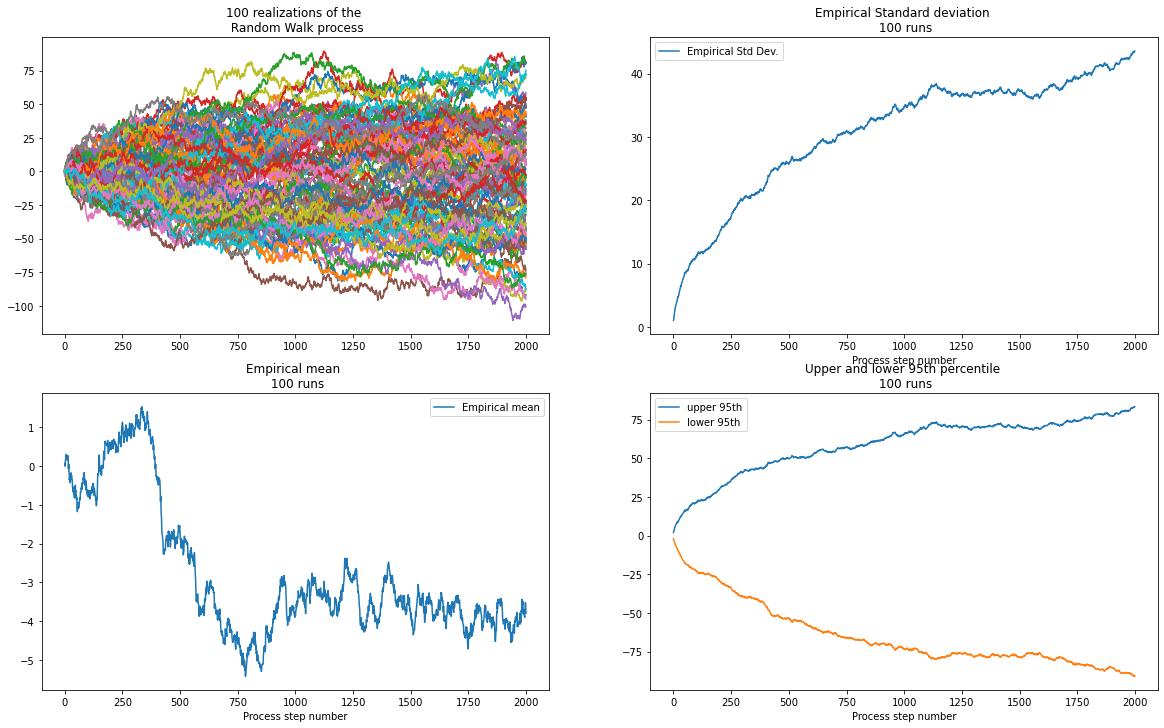

In [192]:
def realize_multiple_walks(n_walks: int, power_spec_density: float = 1, delta_t: float = 1, nsamples: int = 2000, rand_initial: bool = True):
    """
    runs a random walk process and prints the result

    Parameters:
    - nsamples = number of samples 
    - n_walks = number of times to run the random walk process
    - delta_t = sample interval
    - power_spec_density = power spectrum density
    - rand_intial = If true, start with a random initial condition. Default False

    Returns:
    A tuple of all the results, the empirical Standard Dev., the formal Std. Dev, and the empirical mean
    """
    # calculate variance
    qk = power_spec_density*delta_t

    # initialize empty array to calculate the theoretical standard deviation
    theoretical_sd = np.zeros(nsamples)
    theoretical_sd[0] = qk

    # calculate theoretical standard deviation with a loop
    for i in range(1, nsamples):
        sd = np.sqrt((theoretical_sd[i-1]**2)+qk)
        theoretical_sd[i] = sd

    # create an empty array with dimensions (n_walks,nsamples)
    all_walk_results = np.zeros(
        shape=(n_walks, nsamples)
    )

    # realize the process multiple times
    for walk in range(n_walks):
        walkresults = random_walk_basic(
            power_spec_density, delta_t, nsamples, rand_initial)
        # plt.plot(walkresults)
        all_walk_results[walk, :] = walkresults

    emp_sd = all_walk_results.std(axis=0)
    emp_mean = all_walk_results.mean(axis=0)

    # return all the calculated variables
    return all_walk_results, emp_sd, theoretical_sd, emp_mean


n100_walks, emp_sd_100, theoretical_sd_100, emp_mean_100 = realize_multiple_walks(
    100)

plot_mean_std_dev(n100_walks, 'Random Walk')


### Question 1.b

> Take your code from question I.a, and modify it to repeat the simulation 20 times. This time you will only plot the empirical mean, empirical standard deviation and formal standard deviation of each simulation (so the plot contains 20 means and standard deviations). Include in your notebook 
> - the resulting plot, and, 
> - your conclusions on the empirical mean, empirical standard deviations and formal standard deviation.

In [193]:
def one_b_multiple_walks(n_walks, power_spec_density: float = 1, delta_t=1, nsamples=2000, rand_initial=True):
    """ runs a random walk simulation, with a number of samples nsamples, n_walks times, and plots the result and the"""
    qk = power_spec_density*delta_t
    theoretical_sd = np.zeros(nsamples)
    theoretical_sd[0] = qk

    for i in range(1, nsamples):
        sd = np.sqrt((theoretical_sd[i-1]**2)+qk)
        theoretical_sd[i] = sd

    all_walk_results = np.zeros((n_walks, nsamples))

    for walk in range(n_walks):
        all_walk_results[walk, :] = random_walk_basic(
            power_spec_density, delta_t, nsamples, rand_initial)

    emp_sd = all_walk_results.std(axis=0)
    emp_mean = all_walk_results.mean(axis=0)
    plt.clf()
    plt.figure(figsize=(20, 10))
    plt.plot(emp_sd, label='Empirical Std Dev.')
    plt.plot(theoretical_sd, label='Formal Std. Dev.')
    plt.plot(emp_mean, label='Empirical mean')
    plt.title(f'Mean and standard deviation of {n_walks} Random walks')
    plt.legend()
    plt.show()


Using the function defined above, 100 and 20 realizations are compared using the same plot style

<Figure size 432x288 with 0 Axes>

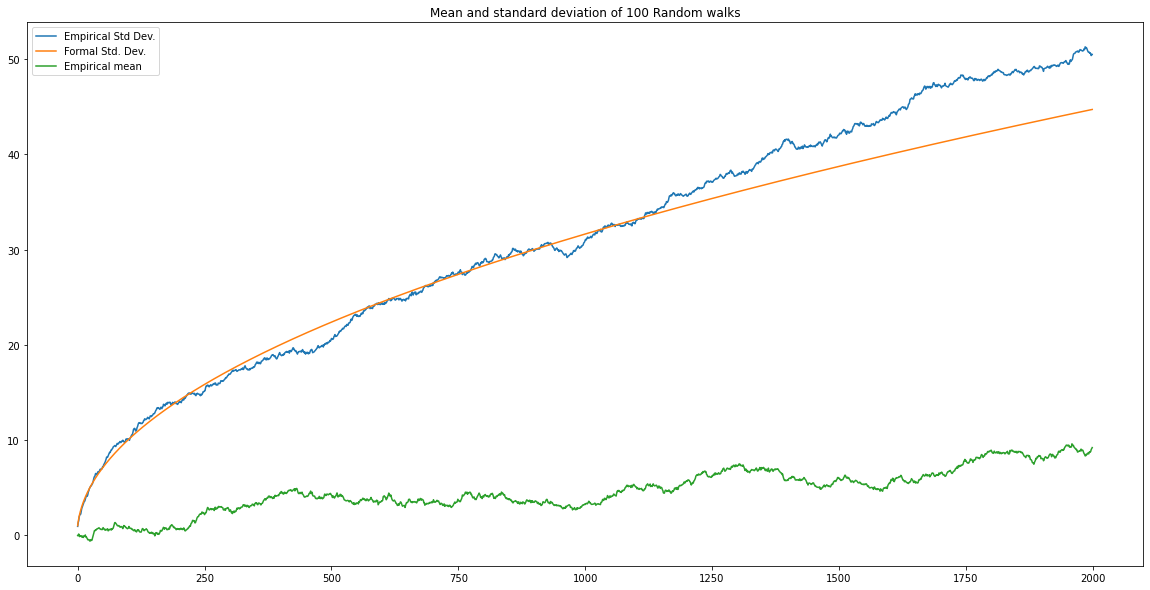

<Figure size 432x288 with 0 Axes>

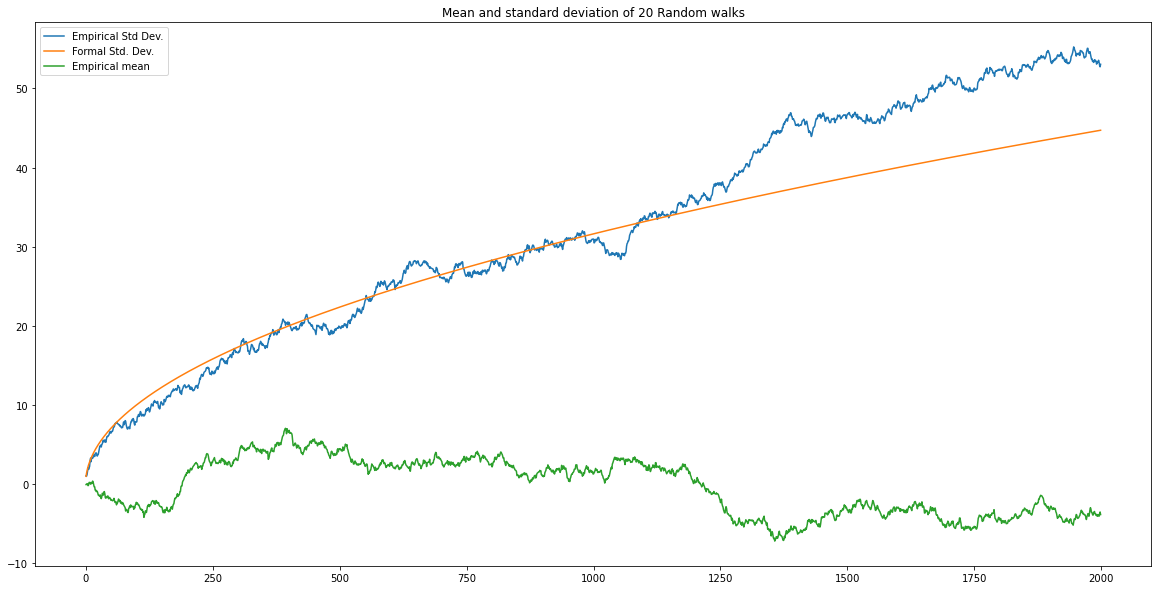

In [194]:
one_b_multiple_walks(n_walks=100, power_spec_density=1,
                     delta_t=1, nsamples=2000)

one_b_multiple_walks(n_walks=20, power_spec_density=1,
                     delta_t=1, nsamples=2000)


We can see major differences in the plots between the 100 realizations of the process and 20 realizations. The more realizations that are being compared, the closer the standard deviation hews to the formal standard deviation. While both experiments show that the standard deviation generally follows the curve of the theoretical $\sigma$, the plot with 20 runs shows that the empirical standard deviation deviates from the theoretical one more. 

The theoretical mean should be 0, and we can also see the same trend here where the 100 realizations mean varies around zero but stays closer to the theoretical values. 

The theoretical values could be considered the limit as you take more realizations of the process. To test this, the plot below shows the results when the number of random walks being considered is increased to 5000. The values to start to converge to the theoretical values. 

<Figure size 432x288 with 0 Axes>

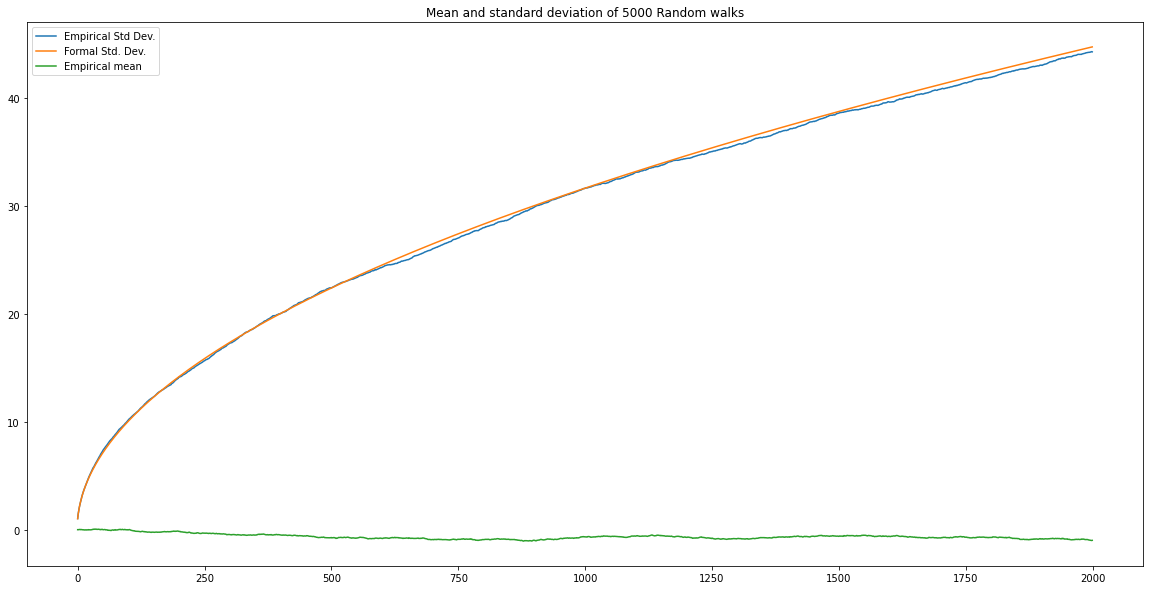

In [195]:
one_b_multiple_walks(n_walks=5000, power_spec_density=1,
                     delta_t=1, nsamples=2000)


### Question I.c

> A sequence is said to be wide-sense stationary when the mean and variance do not change with time. Is the random walk process  x_k wide-sense stationary? 

Because the variance of the process is increasing over time, and does not appear to be following any cyclic pattern (and hence there will be no auto-correlation), the random walk process is found to be *not* wide-sense stationary.

## Part II - First order Gauss-Markov process

> A first order Gauss-Markov process is an example of a colored noise process. The first order Gauss-Markov process is a special case of an auto-regressive, or, AR(1) process. The first order Gauss-Markov process is generated using the following recursive formula
>
> $x_k = e^{-\beta \Delta t} x_{k-1} + w_k \ \ \ \ \ \ \ \ w_k \sim N(0,q_k = \frac{q}{2\beta} (1 - e^{-2 \beta \Delta t} ))$
> 
> with $w_k$ normal distributed Gaussian noise with variance $q_k = \frac{q}{2\beta} (1 - e^{-2 \beta \Delta t})$  and with 𝑞 the power spectral density of the underlying *white noise* process . 
> 
> The series $x_k$ is wide sense stationary and describes an exponentially correlated noise process (colored noise): the standard deviation $\sigma_{x_k}$ of $x_k$ is equal to $\sqrt{q/2\beta}$  (verify this yourself) and the correlation period is $T=1/\beta$.  
> 
> The standard deviation for the initial condition $x_0$ is $\sqrt{q/2\beta}$, the same as the standard deviation for any $x_k$, which makes sense because the process is wide sense stationary. 
> 
> Usually we do *not* select values for $q$ and $\beta$, but compute these values from a *chosen* value for the standard deviation $\sigma_{x_k} = \sigma_x$ (constant in time)  and the *chosen* correlation length $T$ for the time series $x_k$, and then  compute $q$ and $\beta$ using the equations $\beta = \frac{1}{T}$ and $q = 2 \beta \sigma_x^2$.  

### Question II.a

> Generate a first order Gauss-Markov sequence with sample interval $\Delta t = 1$ (s), a length of $N=2000$, correlation period $T=100$ (s), and standard deviation $\sigma_x = 1$. Repeat this 30 times and plot all 30 realizations in a single plot. The plot should contain 
> - The 30 realizations of the Gauss-Markov sequence $x_k$  
> - The *formal* standard deviation $\sigma_{x_k}$ as function of time, computed using error propagation on the recursive formula
> - The *empirical* mean and standard deviation of $x_k$ as function of time (using the functions mean and std) 
>
> Hint: for visual appearance, plot instead of the formal and empirical standard deviations, the boundaries of the 95\% reliability interval $-2 \sigma_{x_k}$ and $+2 \sigma_{x_k}$.

<Figure size 432x288 with 0 Axes>

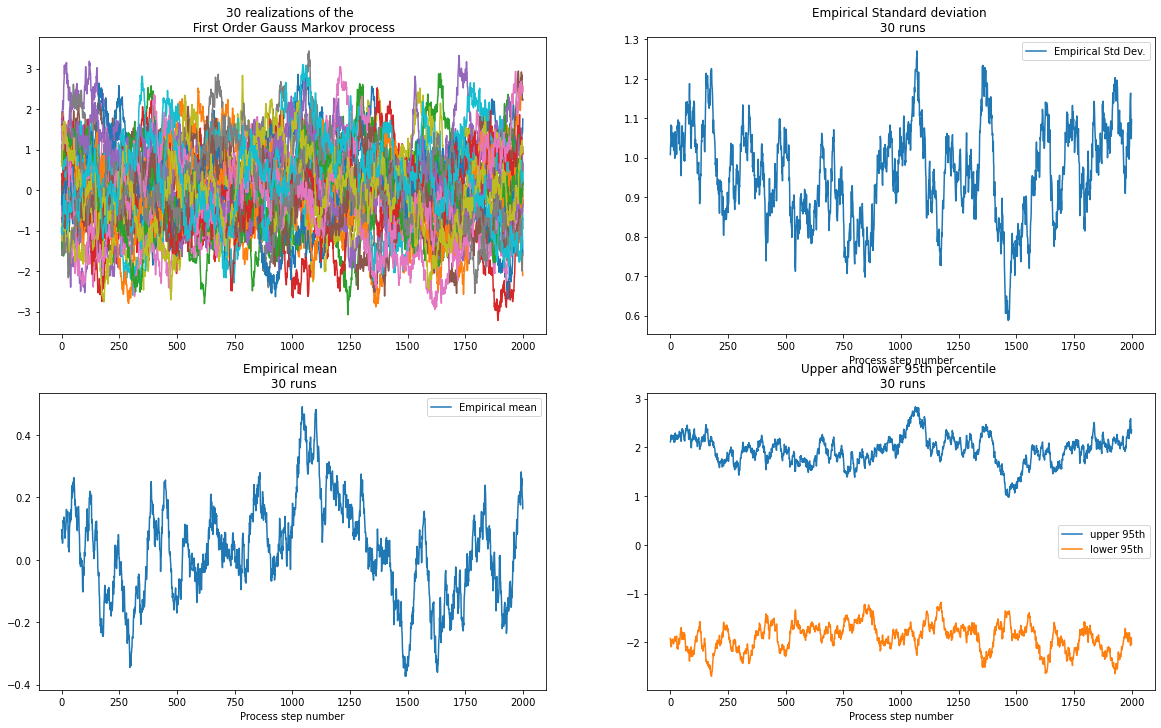

In [196]:
def fogmp(delta_t: float = 1, nsamples: int = 2000, T: float = 100, std_dev: float = 1) -> np.ndarray:
    """
    Calculate one first order gauss-markov process series, plot each step, and return the resulting series as an array

    Parameters:
    delta_t (float): the sample interval in seconds
    nsamples (int): the number of samples
    T (float): the correlation period
    std_dev (float): the standard deviation of the underlying process

    Returns:
    np.ndarray of the single process
    """
    # create an empty array
    x = np.zeros(nsamples)

    # calculate the some of the intermediate values required for the series
    β = 1/T  # autocorrelation period
    q = 2*β*std_dev**2  # power spectral density of the process

    # calculate the variance of the gaussian noise
    qk = (q/(2*β))*(1-np.exp(-2*β*delta_t))

    # create an array of random numbers using the values calculated above
    wk = rng.normal(loc=0, scale=np.sqrt(qk), size=nsamples)

    # initialize array
    x[0] = rng.normal(loc=0, scale=np.sqrt(q/(2*β)), size=1)

    # loop over the array to calculate the series
    for k in range(1, nsamples):
        x[k] = np.exp(-β*delta_t)*x[k-1] + wk[k]

    # return the series
    return x


fogmp()


def run_multiple_fogmp(nruns: int, delta_t: float = 1, nsamples: int = 2000, T: float = 100, std_dev: float = 1) -> np.ndarray:
    """
    Run the process multiple times. Default parameters are based on the values in the assignment. 

    Parameters:
    nruns: how many times to run the process 
    delta_t (float): the sample interval in seconds
    nsamples (int): the number of
    T (float): the correlation period
    std_dev (float): the standard deviation of the underlying process

    Returns: 
    ndarray of the resulting realizations
    """
    # create an empty array to hold the each run of the first order gauss markov process.
    x_array = np.zeros((nruns, nsamples))

    # run the fogmp() process nruns times
    for run in range(nruns):
        x_array[run, :] = fogmp(delta_t, nsamples, T, std_dev)

    emp_sd = x_array.std(axis=0)
    emp_mean = x_array.mean(axis=0)

    # going to add the formal sd calculation to this function.
    return x_array,emp_sd,emp_mean


# unpack the results into seperate variables
fogmp_30_runs,emp_sd_30,emp_mean_30 = run_multiple_fogmp(30)

# plot the resulting 2d array
plot_mean_std_dev(
    fogmp_30_runs, 'First Order Gauss Markov'
)


### Question II.b

> The *formal* standard deviation $\sigma_{x_k}$, that you computed using error propagation on the recursive formula, should be constant, which is what we expect for a process that is wide-sense stationary. Actually it was one of our input parameters $\sigma_x = 1$, so it should be. The question is, is the process you simulated actually wide-sense stationary? 
To verify you are asked to
> - If you haven’t done so already, compute the formal variance $\sigma_{x_k}$ using error propagation on the recursion formula (as you did with the random-walk process). You should again get a constant, but do you?
> - Increase the number of realisations to obtain a more precise estimate of the *empirical* standard deviation. Does it converge to the *formal* standard deviation $\sigma_{x_k}$ computed from the recursion formula?
>
> When there are deviations these probably occur at the start of the simulation, and are related to the way you initialized the initial values $x_0$. Please explain how you initialized the sequence and what this means for the wide-sense stationarity of the process.  

 By applying error propagation to the recursive formula for the gauss-markov process, we can find the following formula:

 $\sigma_{x_k}^2 = (e^{-\beta \Delta t})^2 \cdot \sigma_{x_{k-1}}^2  + q_k$
 
To visualize how this changes over time we can create the following function in python and graph the results:

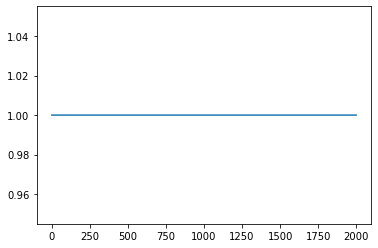

In [197]:
# compute formal variance using recursion formula,
# if you have already done this, simply leave this cell as is
def fogmp_formal_variance(
    delta_t: float = 1,
    nsamples: int = 2000,
    T: float = 100,
    std_dev: float = 1
) -> None:
    """
    Computes the formal error propagation for the 
    first order gauss-markov process

    Parameters:
    delta_t (float): the sample interval in seconds
    nsamples (int): the number of samples
    T (float): the correlation period
    std_dev (float): the standard deviation of the underlying process

    Returns: 
    None, plot to the output console
    """
    # create an empty array
    x = np.zeros(nsamples)

    # calculate the some of the intermediate values
    # required for the series
    β = 1/T  # autocorrelation period
    q = 2*β*std_dev**2  # power spectral density of the process

    # calculate the variance of the gaussian noise
    qk = (q/(2*β))*(1-np.exp(-2*β*delta_t))
    sigma = np.sqrt(q/(2*β))

    # create the empty arrary to hold the results
    fm_st_dev = np.zeros(shape=nsamples)
    # initialize the array with the first standard deviation value
    fm_st_dev[0] = sigma
    # loop over the rest of the values in the array
    for i in range(1, nsamples):
        fm_st_dev[i] = np.sqrt((np.exp(-β*delta_t)**2)*fm_st_dev[i-1]**2+qk)

    plt.plot(fm_st_dev)


fogmp_formal_variance()


<Figure size 432x288 with 0 Axes>

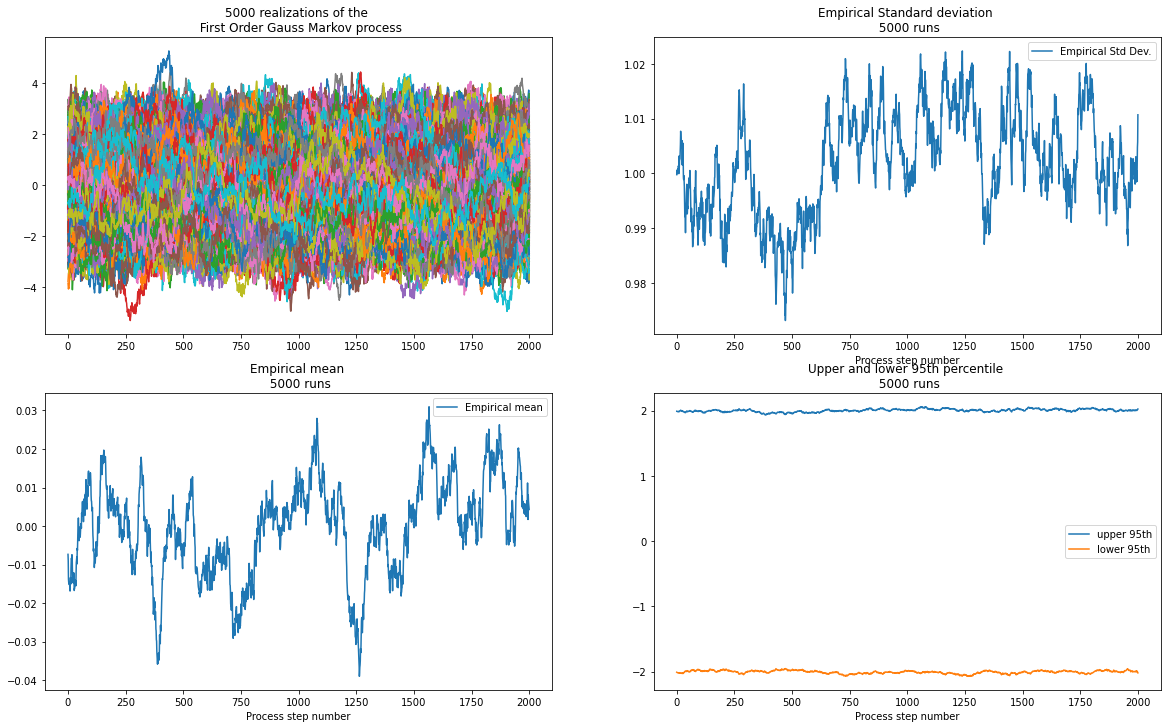

In [198]:
# run the code again using more realisations (here it comes in handy if you have the basic functionality in functions)
fogmp_5000_runs,emp_sd_5000,emp_mean_5000 = run_multiple_fogmp(5000)
plot_mean_std_dev(
    fogmp_5000_runs,
    'First Order Gauss Markov'
)



The sequence was initialized using a random value drawn from the standard normal distribution with the standard deviation $\sqrt{q/2\beta}$. Over a long enough period the initial condition will not affect the wide-sense stationarity because a wide-sense stationary process the mean must be constant as well as the variation of the signal with a time-shifted version of itself. The effect of the initial condition doesn't impact how the mean varies in time, and once enough periods of the cycle are completed will not affect the autocorrelation of the signal.

### Question II.c 

> Rewrite the code of II.a and II.b into one or more functions (if you haven’t done so already). The core function should return the empirical mean and standard deviation, formal standard deviation and a matrix with the realisations. The function(s) should have well defined inputs and outputs, and include a description on how to use each  function (preferably using Python documentation style).  Use the functions to generate the output of II.a and II.b. Of course, you may use the functions also for II.a and II.b, but we have listed this here as a separate item to emphasize that in II.c  you receive a grade depending on how well the coding is done.

In [199]:
# Place holder for any new code, simply leave this cell as is if you have defined the functions in II.a and II.b


### Question II.d

> Create a new plot with seven samples of a Gauss-Markov series (one realization only for each), each  using different values for $T$, with $T=1$, $T=10$, $T=50$, $T=100$, $T=500$, $T=1000$ and $T=5000$ (s), using the function of II.c (but the actual plotting does not have to be a function). For clarity, offset(shift) each realization in the vertical direction, so that the individual series do not overlap, or use subplots. There are different ways to organize the plots, but the idea is that you produce a plot that effectively shows the effect of using different values for $T$.

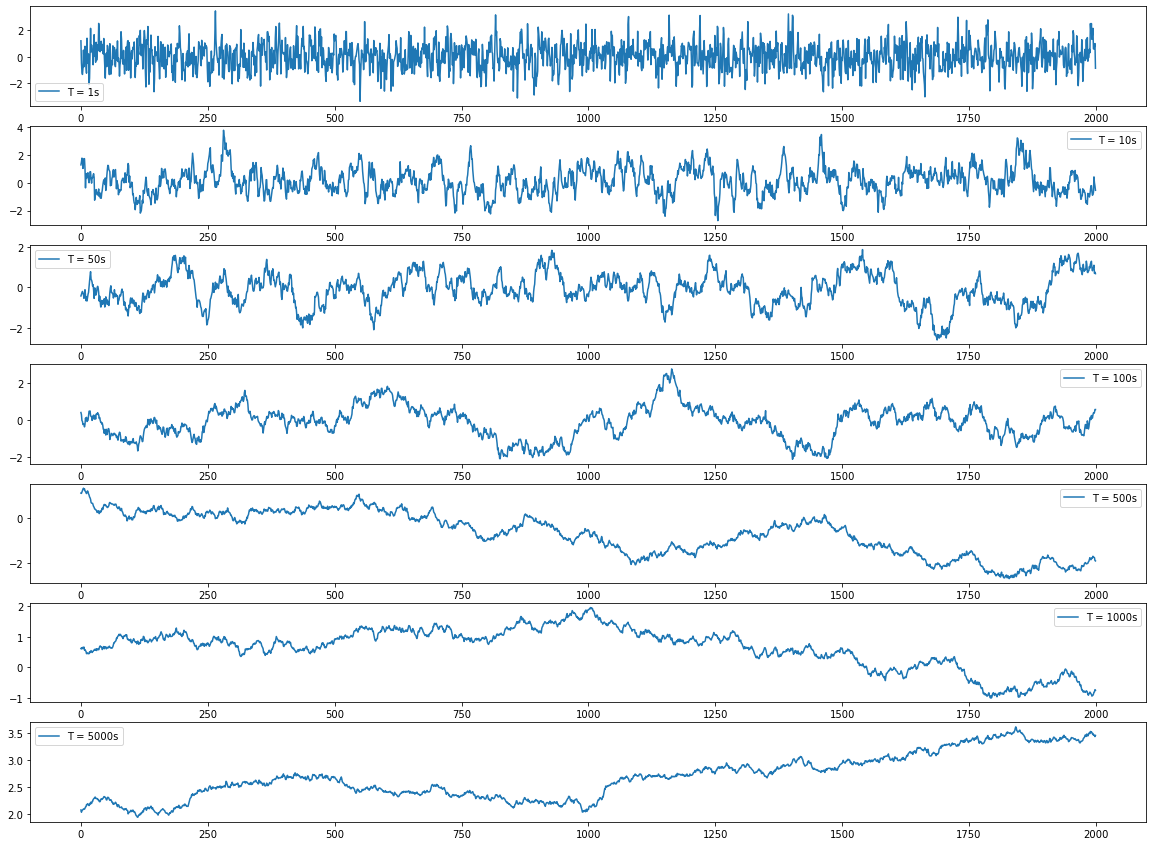

<Figure size 432x288 with 0 Axes>

In [200]:
T_values = [1, 10, 50, 100, 500, 1000, 5000]

plt.figure(figsize=(20, 15))

for i, T in enumerate(T_values):
    # python is zero-indexed so add 1 to match with subplot indexing in pyplot
    plt.subplot(len(T_values), 1, i+1)
    # run the first order gauss markov process with the given value of T, and the default value of everything else
    process_result = fogmp(T=T, nsamples=2000)
    # plot the results
    plt.plot(process_result, label=f'T = {T}s')
    plt.legend()

plt.show()
plt.clf()


## Part III - Standard deviation of the slope (rate of change)

> In this part you will fit a line to each realization and compute the offset and slope.  The expected true values for the offset and slope are both zero, but of course, the estimated empirical values are not equal to zero. 
> 
> You are asked to make a table with the mean and standard deviation of the estimated slope parameter for each of the seven cases of question II.d. To be able to compute the standard deviation of the slope you have to use multiple realizations, unlike question II.d, which plots only a single realization, estimate the slope for each realization, and then compute the mean and standard deviation. Repeat this for every case of II.d .
> 
> What do you conclude from this simulation? For comparison you may also include white noise and random walk processes in this simulation. Please mention your conclusion in your report or notebook.

In [206]:
# Enter your code here, and run it, to show the table with the mean and standard deviation of the estimated slope for each case
import pandas as pd
T_values = [1, 10, 50, 100, 500, 1000, 5000]

parameters_dict = {}  # initialize an empty dictionary outside the loop

for T in T_values:
    # run the first order gauss markov process 500 times with the given value of T, and the default value of everything else
    process_result = run_multiple_fogmp(nruns=500, T=T, nsamples=2000)[0] # only want the first result
    # create a np array that is an integer range based on the length of the vector along axis 1
    x = np.arange(process_result.shape[1])
    # fit a degree 1 polynomial to each of the 30 runs, after transposing the input matrix so that it fits the input required to polyfit
    fitted_linear = np.polyfit(x, process_result.transpose(), deg=1)

    # calculate the standard deviation of the two values and unpack into two variables
    slp_std, offset_std = fitted_linear.std(axis=1)
    # calculate the mean and unpack into two variables
    slope_mean, offset_mean = fitted_linear.mean(axis=1)

    # set the dictionary value to the dictionary
    parameters_dict[T] = [slope_mean, slp_std, offset_mean, offset_std]


In [207]:
# convert the parameters into a dataframe for easy data manipulation
df = pd.DataFrame.from_dict(
    data=parameters_dict,
    orient='index',
    columns=[
        'Slope Mean',
        'Slope Std. Dev.',
        'Intercept Mean',
        'Intercept Std. Dev.',
    ],
)

df


,Slope Mean,Slope Std. Dev.,Intercept Mean,Intercept Std. Dev.
1,-7.603686e-07,0.000051,0.003921,0.060888
10,9.304208e-06,0.000177,-0.006295,0.200436
50,2.719819e-06,0.000367,-0.021543,0.427130
100,-9.328618e-06,0.000472,0.014192,0.572029
500,-1.172584e-05,0.000785,0.039804,0.941586
1000,5.362489e-05,0.000747,-0.040767,1.042799
5000,5.712245e-07,0.000427,0.067587,1.003703


The table above shows the results of running the first-order Gauss-Markov process for 2000 samples 500 times using 7 different values of the autocorrelation period T.

Generally, as the value of T increases, the standard deviation of both the slope and the intercept increase. This is related to the number of steps in the process that are considered. When the default of 2000 samples of the process are compared, we find the highest standard deviation when using an autocorrelation T of 1/2 the number of samples, or slightly less. Therefore when we are looking at many cycles of the process (i.e. T is small compared to the number of steps) it is more likely that the line of best fit will be closer to the true value (slope and offset of 0). This is because fitting a line through more cycles of the function makes it less sensitive to an individual cycle that is randomly higher or lower than the expected value. 

The mean value of the slope of the fitted line increases as T increases. This is because when more cycles of the process are included, the line is more often near zero slope because variations in the cycles average out to zero. Again, this is more related to the ratio of cycles of the number of process steps included. If the number of samples was increased to 20,000 instead of 2000, the averages for the higher values of T would likely become closer to 0. 

The standard deviation of the offset increases towards a maximum value of 1 as the correlation period T increases. This is because when fitting the line one cycle of the auto-correlated process, it is very sensitive to the initial condition, which is a number drawn from the standard normal distribution. Therefore, it is logical that the standard deviation of the offset is 1. The mean of the offset values is found to be close to the expected value of zero. By increasing the number of processes being averaged, this would become even closer to 0. 

<AxesSubplot:xlabel='index', ylabel='Intercept Std. Dev.'>

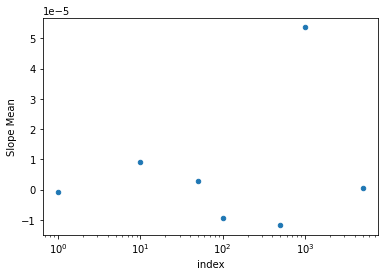

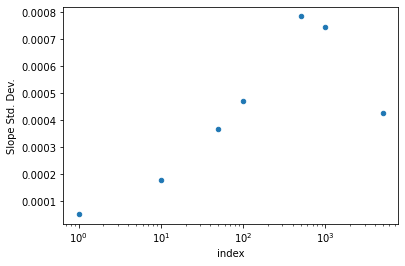

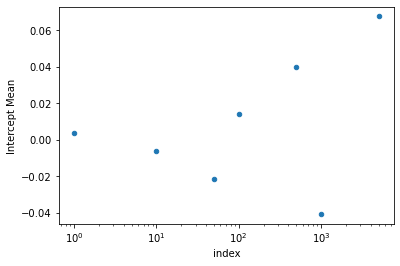

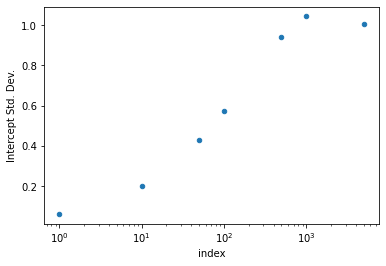

In [208]:
df.reset_index().plot(kind='scatter', x='index', y='Slope Mean', logx=True)
df.reset_index().plot(kind='scatter', x='index', y='Slope Std. Dev.', logx=True)
df.reset_index().plot(kind='scatter', x='index', y='Intercept Mean', logx=True)
df.reset_index().plot(kind='scatter', x='index', y='Intercept Std. Dev.', logx=True)


[End of this Jupyter notebook]